# Computing
## Neural Networks

In [1]:
library(AppliedPredictiveModeling)
data(solubility)
ls(pattern="^solT") 

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

In [ ]:
library(caret)
cor_info <- findCorrelation(cor(solTrainXtrans),cutoff = 0.75)
trn <- solTrainXtrans[,-cor_info]
vld <- solTestXtrans[,-cor_info]
grid_nnet <- expand.grid(.decay = c(0,0.01,0.1),
                        .size = c(1:10),
                        .bag=F)
set.seed(100)
fit_nnet <- train(trn,solTrainY,method = "avNNet",tuneGrid = grid_nnet,
                 preProc=c("center","scale"),linout=T,trace=F,
                 MaxNWts=10*(ncol(trn)+1)+10+1,maxit=500)

Warning message:
"executing %dopar% sequentially: no parallel backend registered"

In [ ]:
fit_nnet
#str(fit_nnet)

```r
Model Averaged Neural Network 

951 samples
141 predictors

Pre-processing: centered (141), scaled (141) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 951, 951, 951, 951, 951, 951, ... 
Resampling results across tuning parameters:

  decay  size  RMSE       Rsquared   MAE      
  0.00    1    0.9955424  0.7699476  0.7670401
  0.00    2    0.9547099  0.7828060  0.7324898
  0.00    3    0.9416635  0.7889724  0.7197022
  0.00    4    0.9264650  0.7970967  0.7030074
  0.00    5    0.9171811  0.8028379  0.7046473
  0.00    6    0.9312480  0.7986332  0.7095412
  0.00    7    0.9747248  0.7834979  0.7421135
  0.00    8    0.9947029  0.7771330  0.7559537
  0.00    9    0.9636434  0.7864126  0.7365986
  0.00   10    0.9301034  0.7986229  0.7119158
  0.01    1    0.8945358  0.8118905  0.6840050
  0.01    2    0.9064388  0.8052389  0.6836026
  0.01    3    0.9099787  0.8046155  0.6897595
  0.01    4    0.8972290  0.8116654  0.6727349
  0.01    5    0.8996906  0.8126475  0.6761702
  0.01    6    0.9304124  0.8022257  0.6980356
  0.01    7    0.9382384  0.7991419  0.7057897
  0.01    8    0.9591937  0.7916248  0.7233283
  0.01    9    0.9395611  0.7974384  0.7065216
  0.01   10    0.9117515  0.8075216  0.6839813
  0.10    1    0.8958780  0.8127087  0.6823978
  0.10    2    0.8707881  0.8214753  0.6481455
  0.10    3    0.8849724  0.8167081  0.6580296
  0.10    4    0.8623766  0.8272370  0.6409592
  0.10    5    0.8494817  0.8319133  0.6331638
  0.10    6    0.8457109  0.8336080  0.6296669
  0.10    7    0.8232901  0.8418262  0.6100769
  0.10    8    0.8291762  0.8399375  0.6140528
  0.10    9    0.8277838  0.8397256  0.6149164
  0.10   10    0.8223222  0.8414366  0.6084166

Tuning parameter 'bag' was held constant at a value of FALSE
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 10, decay = 0.1 and bag
 = FALSE.
```

In [42]:
library(nnet)
fit_nnet <- nnet(trn,solTrainY,size=1,decay = 0.01,linout = T,trace = F,maxit = 500,MaxNWts =1*(ncol(trn)+1)+1+1)

In [45]:
RMSE(pred = fit_nnet$fitted.values,obs = solTrainY)

[1] 0.6446603

## MARS

Selected 40 of 47 terms, and 31 of 228 predictors
Termination condition: RSq changed by less than 0.001 at 47 terms
Importance: NumNonHAtoms, SurfaceArea2, MolWeight, SurfaceArea1, FP142, ...
Number of terms at each degree of interaction: 1 39 (additive model)
GCV 0.3873018    RSS 309.672    GRSq 0.9076346    RSq 0.9221793

Call: earth(x=solTrainXtrans, y=solTrainY)

                                coefficients
(Intercept)                        -4.455949
FP002                               0.733904
FP003                              -0.203502
FP059                              -0.613495
FP065                              -0.278610
FP075                               0.295269
FP083                              -0.563202
FP085                              -0.193880
FP099                               0.337591
FP111                              -0.428246
FP135                               0.405277
FP142                               0.397119
FP154                              -0.597650
FP172                              -0.527362
FP176                               0.294774
FP188                               0.407757
FP202                               0.279390
FP204                              -0.336720
FP207                               0.424005
h(MolWeight-5.77157)               -1.964915
h(5.94458-M

 plotmo grid:    FP001 FP002 FP003 FP004 FP005 FP006 FP007 FP008 FP009 FP010
                     0     1     0     1     1     0     0     0     0     0
 FP011 FP012 FP013 FP014 FP015 FP016 FP017 FP018 FP019 FP020 FP021 FP022 FP023
     0     0     0     0     1     0     0     0     0     0     0     0     0
 FP024 FP025 FP026 FP027 FP028 FP029 FP030 FP031 FP032 FP033 FP034 FP035 FP036
     0     0     0     0     0     0     0     0     0     0     0     0     0
 FP037 FP038 FP039 FP040 FP041 FP042 FP043 FP044 FP045 FP046 FP047 FP048 FP049
     0     0     0     0     0     0     0     0     0     0     0     0     0
 FP050 FP051 FP052 FP053 FP054 FP055 FP056 FP057 FP058 FP059 FP060 FP061 FP062
     0     0     0     0     0     0     0     0     0     0     0     0     0
 FP063 FP064 FP065 FP066 FP067 FP068 FP069 FP070 FP071 FP072 FP073 FP074 FP075
     0     0     1     1     0     0     0     0     0     1     0     0     0
 FP076 FP077 FP078 FP079 FP080 FP081 FP082 FP083 FP084 F

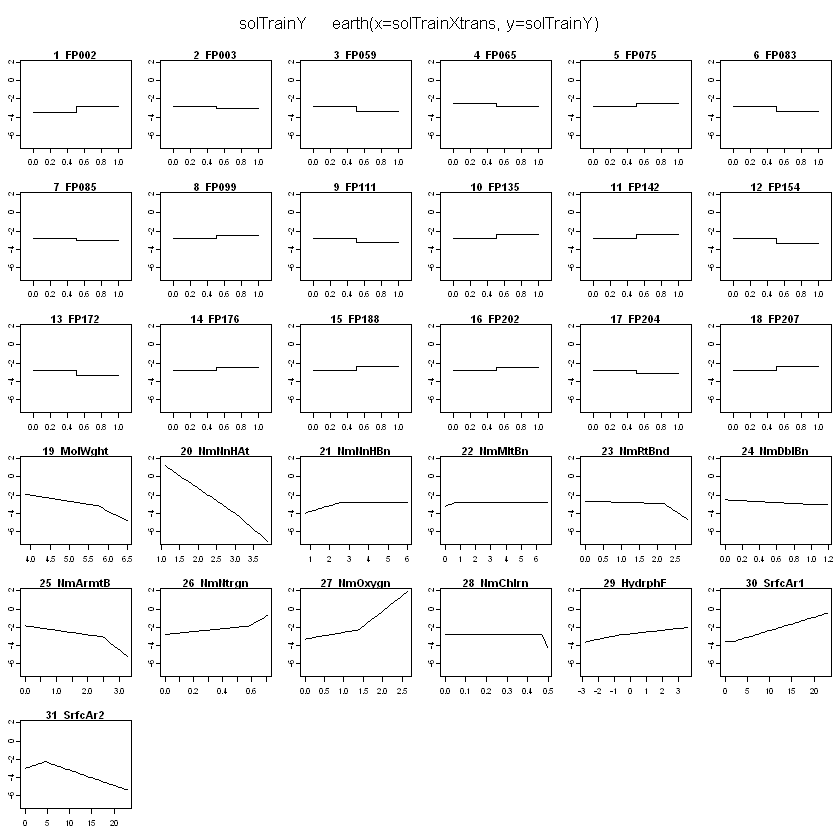

In [4]:
library(earth)
fit_mars <- earth(solTrainXtrans,solTrainY)
fit_mars
summary(fit_mars)
plotmo(fit_mars)

In [9]:
#caret wrapper
grid_mars <- expand.grid(.degree=1:2,.nprune=2:38)
set.seed(100)
fit_mars <- train(solTrainXtrans,solTrainY,
                 method="earth",tuneGrid=grid_mars,trControl=trainControl(method="cv"))
fit_mars

Multivariate Adaptive Regression Spline 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results across tuning parameters:

  degree  nprune  RMSE       Rsquared   MAE      
  1        2      1.5610000  0.4198695  1.1947358
  1        3      1.0734760  0.7254086  0.8215423
  1        4      0.9865814  0.7648470  0.7598549
  1        5      0.9107653  0.7992922  0.7060994
  1        6      0.8843640  0.8119566  0.6828926
  1        7      0.8504298  0.8276453  0.6625704
  1        8      0.8394580  0.8324576  0.6511954
  1        9      0.8476625  0.8290399  0.6542765
  1       10      0.8369444  0.8322989  0.6466129
  1       11      0.8247644  0.8365905  0.6370129
  1       12      0.8220283  0.8385922  0.6330253
  1       13      0.8019738  0.8454965  0.6148967
  1       14      0.8011014  0.8463156  0.6130984
  1       15      0.7771126  0.8542163  0.5927403
  1       16     

In [12]:
head(grid_mars)

.degree,.nprune
1,2
2,2
1,3
2,3
1,4
2,4


In [14]:
head(predict(fit_mars,solTestXtrans))

y
0.1039606
0.1947099
-0.5955380
-0.1009029
-0.3673199
0.5485541


In [15]:
varImp(fit_mars)
plot(varImp(fit_mars))

earth variable importance

  only 20 most important variables shown (out of 228)

                 Overall
MolWeight        100.000
NumNonHAtoms      92.063
SurfaceArea1      92.063
FP137             48.333
NumHydrogen       37.844
NumRotBonds       35.609
NumOxygen         29.112
FP043             23.458
FP040             22.969
SurfaceArea2      22.663
FP101             19.136
FP021             15.246
NumMultBonds      15.246
FP170              9.798
FP059              8.194
NumAromaticBonds   4.292
FP070              0.000
FP029              0.000
FP147              0.000
FP189              0.000

## SVM

In [33]:
class(solTrainXtrans)
class(solTrainY)

[1] "data.frame"

[1] "numeric"

In [34]:
library(kernlab)
fit_svm <- ksvm(x = as.matrix(solTrainXtrans), y = solTrainY, kernel ="rbfdot", 
                kpar="automatic",C = 1, epsilon = 0.1)
fit_svm
#kernel = "polydot "多项式核函数
#kernel = "vanilladot " 线性核函数

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.00267110649668625 

Number of Support Vectors : 670 

Objective Function Value : -126.7081 
Training error : 0.042511 

In [25]:
fit_svm <- train(solTrainXtrans,solTrainY,method="svmRadial",
                preProc=c("center","scale"),tuneLength=14,trControl=trainControl(method="cv"))
fit_svm$finalModel

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 128 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0026629721069908 

Number of Support Vectors : 633 

Objective Function Value : -736.3582 
Training error : 0.009316 

## knn

In [27]:
#Remove a few sparse and unbalanced fingerprints first
trn <- solTrainXtrans[,-nearZeroVar(solTrainXtrans)]
set.seed(100)
fit_knn <- train(trn,solTrainY,method="knn",
                preProc=c("center","scale"),
                tuneGrid=data.frame(.k=1:20),
                trControl=trainControl(method="cv"))

fit_knn

k-Nearest Neighbors 

951 samples
225 predictors

Pre-processing: centered (225), scaled (225) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 856, 856, 855, 855, 857, 856, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE      
   1  1.250232  0.6611312  0.9165221
   2  1.103952  0.7197662  0.7988127
   3  1.065688  0.7350824  0.7903996
   4  1.043534  0.7449116  0.7860586
   5  1.049529  0.7409384  0.7889923
   6  1.058417  0.7359120  0.7986353
   7  1.060938  0.7331595  0.7980003
   8  1.055874  0.7358010  0.7974424
   9  1.065884  0.7311823  0.8082185
  10  1.070847  0.7286249  0.8134830
  11  1.069596  0.7302802  0.8124852
  12  1.076953  0.7269775  0.8202945
  13  1.088453  0.7204797  0.8318907
  14  1.093359  0.7181335  0.8380720
  15  1.100073  0.7149682  0.8461514
  16  1.104751  0.7127331  0.8533856
  17  1.109370  0.7101825  0.8581988
  18  1.119957  0.7059283  0.8669092
  19  1.127248  0.7024141  0.8742935
  20  1.132476  0.6